In [1]:
import findspark
import matplotlib.pyplot as plt

findspark.init("/home/xuren/pyspark/spark-2.4.5-bin-hadoop2.7/")

import pyspark
import numpy as np
import pandas as pd

In [3]:
spark = pyspark.sql.SparkSession.builder.getOrCreate()

In [4]:
df = spark.read.parquet("hmp.parquet")

In [6]:
df.createOrReplaceTempView("hmpdf")

In [7]:
df.show(5)

+---+---+---+--------------------+-----------+
|  x|  y|  z|              source|      class|
+---+---+---+--------------------+-----------+
| 22| 49| 35|Accelerometer-201...|Brush_teeth|
| 22| 49| 35|Accelerometer-201...|Brush_teeth|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|
| 21| 52| 34|Accelerometer-201...|Brush_teeth|
+---+---+---+--------------------+-----------+
only showing top 5 rows



In [15]:
result = spark.sql("""select x from hmpdf where x is not null""")

In [23]:
result.take(5)

[Row(x=22), Row(x=22), Row(x=22), Row(x=22), Row(x=21)]

In [18]:
result.rdd

MapPartitionsRDD[13] at javaToPython at NativeMethodAccessorImpl.java:0

In [24]:
rdd = result.rdd.map(lambda v: v.x)

In [27]:
rdd.count()

446529

In [31]:
rdd.sample(withReplacement=False, fraction=0.1).count()

44917

In [32]:
rdd.sample(withReplacement=False, fraction=0.01).count()

4510

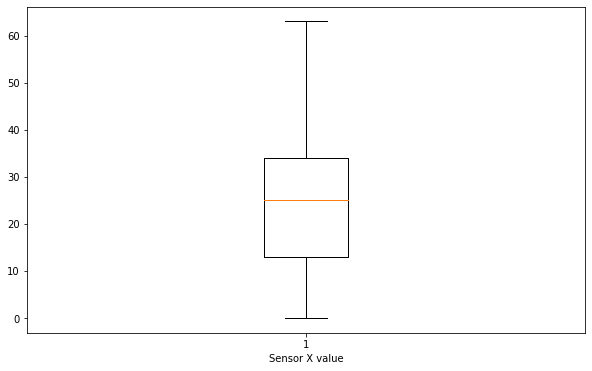

In [36]:
plt.figure(figsize=(10,6))
plt.boxplot(rdd.sample(withReplacement=False, fraction=0.01).collect())
plt.xlabel("Sensor X value")
plt.show()

In [47]:
sample_df_pd = df.sample(withReplacement=False, fraction=0.01).toPandas()

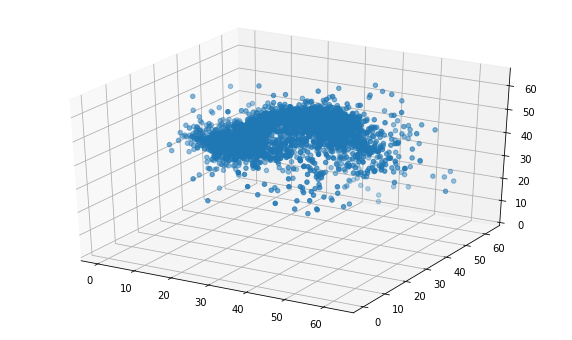

In [48]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=sample_df_pd["x"],
           ys=sample_df_pd["y"],
           zs=sample_df_pd["z"])

In [57]:
import seaborn as sns

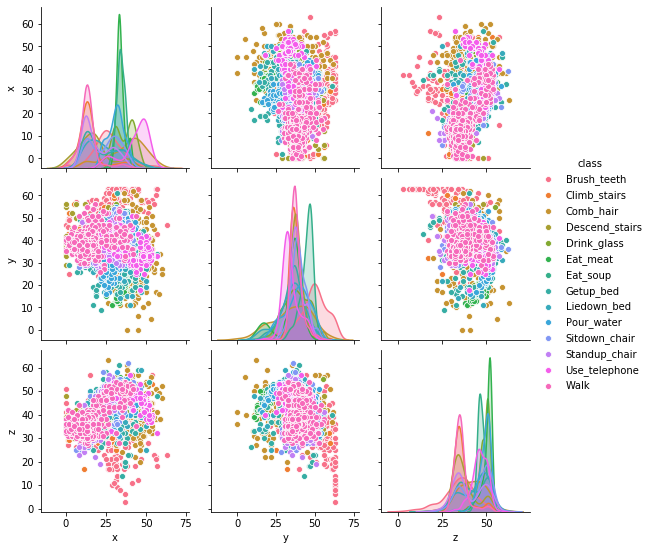

In [65]:
sns.pairplot(data=sample_df_pd[["x", "y", "z", "class"]], hue="class")